# Homework 1

### Name: Aakarsh Nair

## IMPORTANT NOTES
**Teams**
- You are encouraged to work in teams of two.
- Each team member must submit the file!
- State that you worked as a team: in the filename and/or inside the notebook.

**Submission**
- deadline is Wednesdays 8 am (such that I can give you feedback until the tutorial)
- extended deadline is Wednesday 4 pm (with a 25% point deduction)
- Put your name into the file name and upload to ILIAS (each team member).
- We recommend solving the theoretical exercises inside the notebook, which will improve your Latex skills. Alternatively, submit the theoretical exercises as pdf.

**Use of LLMs**
- you are allowed and encouraged to use LLMs (github copilot is free for students, Le Chat, ChatGPT, etc.)
- you must edit the code! Especially, make sure
    - you understand the code,
    - that it's correct
    - that it's concise
- you are responsible for your submission

**Plots**
- plots must have every element labeled (axes, lines, dots, ...)
- optionally, make your plots nicer: sns.despine(), ax.legend(frameon=False), etc.
- choose a reasonable figsize (big enough to have everything visible, small enough to fit within the width of a hypothetical half or full A4 page)

In [1]:
from IPython.display import display, Math, Latex

# Libraries you might need
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# You can use this function for plotting raster plots (spikes), or you can use your own defined function
def raster(event_times_list, color='k', t_max=10., ax=None):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    https://scimusing.wordpress.com/2013/05/06/making-raster-plots-in-python-with-matplotlib/
    """
    if ax is None:
        ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        ax.vlines(trial, ith + .5, ith + 1.5, color=color)
    ax.set_ylim(.5, len(event_times_list) + .5)
    ax.set_yticks([])
    ax.set_ylabel('Spike train')
    ax.set_xlim((0,t_max))
    ax.set_xlabel('Time [s]')
    return ax

## Exercise 1

1) Take interval [0,10 sec]. We will simulate spikes within this interval to form a Poisson spike train. To do so we are going to use exponenetial distribution for inter-spike intervals. First spike-time (relative to time 0) is drawn from the exponential distribution with parameter $\tau$ , thus $t_1 \sim Exp(\tau) = 1/\tau e^{-t_1/\tau}$. All subsequent spikes are determined relative to the previous via $t_{k+1} = t_k + \Delta t$ with $\Delta t \sim Exp(\tau)$. Stop when the new spike-time exceed 10 sec. (1.5 points per each sub-task, tasks with a "*" give additional points)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_spike_train_simple(tau, length, n_trials):
    """
    Generates Poisson spike trains for multiple trials.

    Args:
        tau (float): Time constant of the exponential distribution (in seconds).
        length (float): Length of the simulation (in seconds).
        n_trials (int): Number of trials to generate.

    Returns:
        list: A list of lists, where each inner list contains the spike times for one trial.
    """
    spike_times_list = []
    for _ in range(n_trials):
        spike_times = []
        t = 0
        while t < length:
            dt = np.random.exponential(tau)  # Generate ISI from exponential distribution
            t += dt
            if t < length:
                spike_times.append(t)
        spike_times_list.append(spike_times)
    return spike_times_list

# Example usage:
tau = 0.1  # seconds
length = 10  # seconds
n_trials = 5  # Number of trials
spike_trains = poisson_spike_train_simple(tau, length, n_trials)

print(f"{len(spike_trains)} trials generated with {len(spike_trains[0])} spikes each.")


5 trials generated with 85 spikes each.


a) Plot one spike train for each of the following parameter values: $\tau = 1$ sec, $\tau = 0.1$ sec, $\tau = 0.01$ sec  

tau = 1.0, spikes = 14
tau = 0.1, spikes = 109
tau = 0.01, spikes = 999


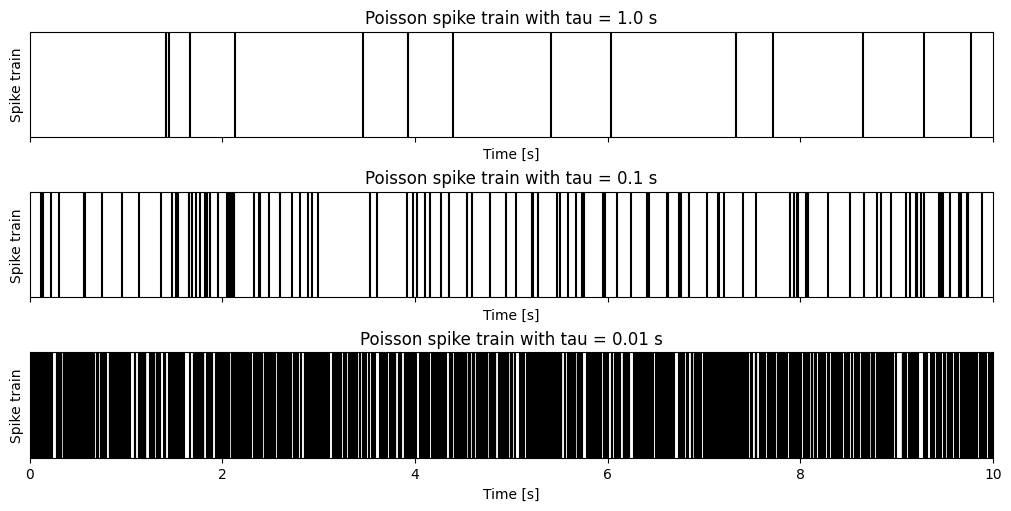

In [13]:
length = 10
taus = [1., 0.1, 0.01]

fig, axs = plt.subplots(nrows=len(taus), figsize=(10, 5), sharex=True, constrained_layout=True)
for tau, ax in zip(taus, axs):
    # Plot one spike train for each parameter value.
    spike_times = poisson_spike_train_simple(tau, length, 1)
    print(f"tau = {tau}, spikes = {len(spike_times[0])}")
    # Plot
    raster(spike_times, ax=ax)
    ax.set_title(f'Poisson spike train with tau = {tau} s')
    ax.set_ylabel('Spike train')
axs[-1].set_xlabel('Time [s]')
plt.show()

b) Simulate 50.000 spike trains for each parameter in a) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance (not standard deviation).

Mean: 9.99954, Variance: 9.9300197884
Mean: 99.9922, Variance: 99.55345915999999
Mean: 1000.15592, Variance: 1002.4720489536


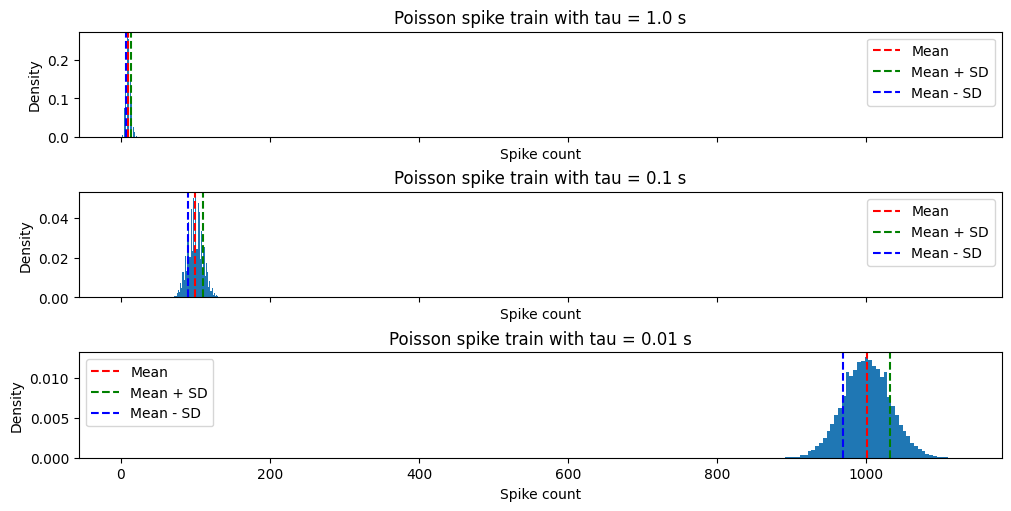

In [5]:
# b) Simulate 50.000 spike trains for each parameter in a) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance (not standard deviation)

n_trials = 50000
counts = []
for tau in taus:
    spike_times = poisson_spike_train_simple(tau, length, n_trials)
    counts.append([len(spikes) for spikes in spike_times])
# Plot histograms
fig, axs = plt.subplots(nrows=len(taus), figsize=(10, 5), sharex=True, constrained_layout=True)
for tau, count, ax in zip(taus, counts, axs):
    ax.hist(count, bins=50, density=True)
    ax.set_title(f'Poisson spike train with tau = {tau} s')
    ax.set_ylabel('Density')
    ax.set_xlabel('Spike count')
    mean = np.mean(count)
    var = np.var(count)
    print(f"Mean: {mean}, Variance: {var}")
    ax.axvline(mean, color='r', linestyle='--', label='Mean')
    ax.axvline(mean + np.sqrt(var), color='g', linestyle='--', label='Mean + SD')
    ax.axvline(mean - np.sqrt(var), color='b', linestyle='--', label='Mean - SD')
    ax.legend()
plt.show()
spike_times = poisson_spike_train_simple(tau, length, n_trials)


c) Draw 10.000 samples $x_k \in \{0, 1\}$ independently from a Beronulli distribution $P (x_k ) = \lambda^{x_k} (1 − \lambda)^{1−x_k}$ with $k = 1, \ldots , 10.000$ for the following three cases: $\lambda = 0.1$, $\lambda = 0.01$, $\lambda = 0.001$. Plot the random vector $x$ as a spike train for each of the three conditions.

In [14]:
def bernoulli_spike_train(p, n_samples, n_trials):
    spike_times_list = []
    for i in range(n_trials):
        # Generate Bernoulli random variables
        spikes = np.random.binomial(1, p, n_samples)
        # Get the indices of the spikes
        spike_times = np.where(spikes == 1)[0]
        # Convert indices to time
        spike_times = spike_times / n_samples * length
        spike_times_list.append(spike_times)
    return spike_times_list

In [15]:
test_spike_times = bernoulli_spike_train(0.1, 1000, 5)
print(f"{len(test_spike_times)} trials generated with {len(test_spike_times[0])} spikes each.")

5 trials generated with 102 spikes each.


$\lambda$ = 0.1, spikes = 999
$\lambda$ = 0.01, spikes = 92
$\lambda$ = 0.001, spikes = 16


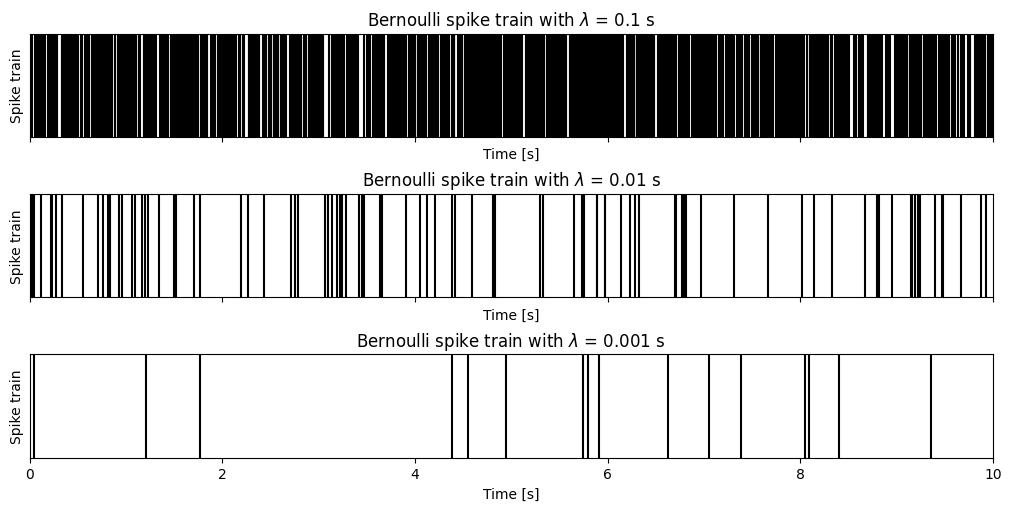

In [21]:
num_samples = 10000
num_trials = 1
L = [0.1, 0.01, 0.001]

fig, axs = plt.subplots(nrows=len(L), figsize=(10, 5), sharex=True, constrained_layout=True)
for l, ax in zip(L, axs):
    # Plot one spike train for each parameter value.
    spike_times = bernoulli_spike_train(l, num_samples, num_trials)
    print(f"$\lambda$ = {l}, spikes = {len(spike_times[0])}")
    # Plot
    raster(spike_times, ax=ax)
    ax.set_title(f'Bernoulli spike train with $\lambda$ = {l} s')
    ax.set_ylabel('Spike train')
axs[-1].set_xlabel('Time [s]')
plt.show()

d) Simulate 50.000 spike trains for each parameter in c) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance.

How do the results differ from those b)?

L: 0.1 Mean: 999.99186, Variance: 901.3001537404001
L: 0.01 Mean: 99.96948, Variance: 98.97278852960002
L: 0.001 Mean: 10.00836, Variance: 10.000250110400001


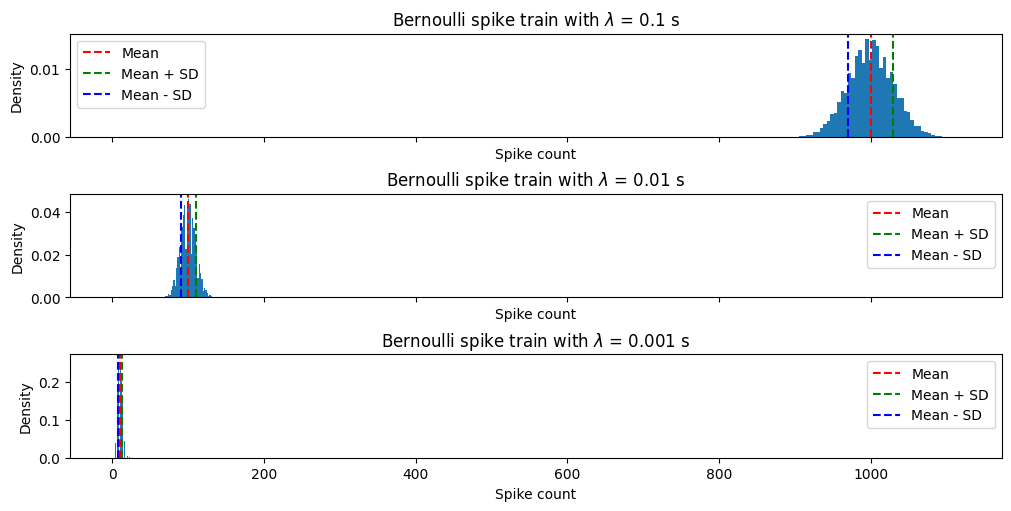

In [23]:
num_samples = 10000
n_trials = 50000
L = [0.1, 0.01, 0.001]

counts = []
for l in L:
    spike_times = bernoulli_spike_train(l, num_samples, n_trials)
    counts.append([len(spikes) for spikes in spike_times])

# Plot histograms
fig, axs = plt.subplots(nrows=len(taus), figsize=(10, 5), sharex=True, constrained_layout=True)
for l, count, ax in zip(L, counts, axs):
    ax.hist(count, bins=50, density=True)
    ax.set_title(f'Bernoulli spike train with $\lambda$ = {l} s')
    ax.set_ylabel('Density')
    ax.set_xlabel('Spike count')
    mean = np.mean(count)
    var = np.var(count)
    print(f"L: {l} Mean: {mean}, Variance: {var}")
    ax.axvline(mean, color='r', linestyle='--', label='Mean')
    ax.axvline(mean + np.sqrt(var), color='g', linestyle='--', label='Mean + SD')
    ax.axvline(mean - np.sqrt(var), color='b', linestyle='--', label='Mean - SD')
    ax.legend()
plt.show()
spike_times = bernoulli_spike_train(tau, length, n_trials)



**Answer**
TODO

e) The cases in which the distributions in b) and d) match and disagree with each other is related to the limit cases discussed in the lecture. Under which circumstance do the Binomial distribution and the Poisson distribution match each other? Under these assumptions, proof, by taking the limit, that the probability functions are the same. (2 points)

*Hint: Relate $\lambda$, $p$, and $n$ to each other. Take the appropriate limit* $$\lim_{\substack{? \to\infty \\ ?\to 0}}$$
*and show that $P_{Bernoulli}(X=s)$ in the limit is the same as $P_{Poisson}(X=s)$.*

**Answer**


**Proof**

Let $\lambda = n p$ then $p = \frac{\lambda}{n}$. Then  consider $n \to \infty$ and $p \to 0$


$
\begin{align}
P_{\text{Binomial}}(X = s) &= {n \choose s} p^s (1-p)^{n-s} \\
&= \frac{n!}{(n-s)! s!} p^s (1-p)^{n-s} \\
&= \frac{n(n-1)(n-2) \dots (n-s+1)}{s!} p^s (1 - p)^{n-s}
\end{align}
$






$
\begin{align}
P_{\text{Poisson}}(X = s) &= \frac{\lambda^s}{s!} e^{-\lambda}
\end{align}
$

## Exercise 2
2) Compute the mean and variance of the Poisson distribution with parameter $\lambda$ (first try yourself) (3 points)

**Answer**

$
\begin{align}
P(x = k) = \text{Poisson}(k \  ; \lambda) = \frac{\lambda^{k} \cdot e^{-\lambda}}{k\,!}
\end{align} \
$
Mean:
$
\begin{align}
E(x) &=  \sum_k k P(X = k) \\
&= \sum_k k \times \frac{\lambda^{k} \cdot e^{-\lambda}}{k\,!} \\
&= e^{-\lambda} \sum_k k \times \frac{\lambda^{k}}{k!}\\
&= e^{-\lambda} \sum_k \frac{\lambda^{k}}{(k-1)!}\\
&= e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^{k}}{(k-1)!} \\
&= \lambda e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^{k-1}}{(k-1)!}\\
&= \lambda e^{-\lambda} e^{\lambda} \\
&= \lambda
\end{align}
$

Variance:
$
\begin{align}
\text{Var}(x) &= E[X^2] - E[X]^2 \\
       &= E[X^2] - \lambda^2 \\
\end{align}
$

$
\begin{align}
E[x^2] &= \sum_k k^2 p(X = k) \\ 
&= \sum_k k^2 \times \frac{\lambda^{k} \cdot e^{-\lambda}}{k\,!} \\
&= e^{-\lambda} \sum_k \frac{k \cdot \lambda^{k}}{(k-1)!}\\
&= e^{-\lambda} \sum_{k=1}^{\infty} \frac{k \cdot \lambda^{k}}{(k-1)!} \\
&= \text{ some magical steps here...}
&= \lambda^2 + \lambda
\end{align}
$



## Exercise 3
3) Show that the sum of two independent Poisson random variables of parameters $\lambda$ and $\mu$ is again Poisson with
parameter $\lambda + \mu $. (2 points)

If $X \sim \text{Poisson}(\lambda) $ and $Y \sim \text{Poisson}(\mu)$, we have:
\begin{equation*}
\begin{split}
P(k = X + Y) & = \sum_{i=0}^{k} P(X = i, Y = k - i) \\
               &= \sum_{i=0}^{k} P(X=i) P(Y=k-i) \\
               &= \sum_{i=0}^{k} \frac{\lambda^{i} \cdot e^{-\lambda}}{i\,!} \frac{\mu^{k-i} \cdot e^{-\mu}}{(k-i)\,!} \\
               &= \sum_{i=0}^{k} \frac{\lambda^{i} \cdot }{i\,!} \frac{\mu^{k-i} \cdot e^{-(\mu+\lambda)}}{(k-i)\,!} \\
               &=  e^{-(\mu+\lambda)}  \sum_{i=0}^{k} \frac{\lambda^{i} \cdot }{i\,!} \frac{\mu^{k-i}}{(k-i)\,!} \\
                &=  e^{-(\mu+\lambda)}  \sum_{i=0}^{k} \frac{\lambda^{i} \cdot \mu^{k-i}}{k\,!} \frac{k!}{i!(k-i)\,!} \\    
                &= e^{-(\mu+\lambda)} \sum_{i=0}^{k} {k \choose i } \lambda^{i} \cdot \mu^{k-i} \frac{1}{k!}\\
                &= e^{-(\mu+\lambda)} \frac{1}{k!} \sum_{i=0}^{k} {k \choose i } \lambda^{i} \cdot \mu^{k-i} \\ 
                &= e^{-(\mu+\lambda)} \frac{1}{k!} (\lambda+\mu)^{k}\\
                &= \frac{(\lambda+\mu)^{k}}{k!}e^{-(\mu+\lambda)} \\
\end{split}
\end{equation*}

Thus $Z= X+Y$ has the distribution matching $\text{Poisson}(\lambda+\mu)$ given that $X$ and $Y$ are independent and $X \sim \text{Poisson}(\lambda) $ and $Y \sim \text{Poisson}(\mu)$